<h1 style="text-align: center;">User-Defined Functions</h1>
<p style="text-align: center;">Lab 2</p>
<p style="text-align: center;">Spring 2025

### 1. Purpose 
Introduce user-defined functions in Python and utilize this feature to demonstrate various signal operations including time shifting, time scaling, signal addition, and discrete differentiation.

### 2. Deliverables Overview 
##### Part 1
[ ] Plot for the function in **Task 2**.  
[ ] Code for the function in **Task 2**.  
  
##### Part 2
[ ] Properly formatted equation for **Task 1**.  
[ ] Plots for **Task 2** and **Task 3**, make sure to use appropriate axis sizes and label each axis.  
[ ] Code for **Task 2** and **Task 3**.  
  
##### Part 3
[ ] Plots for **Task 1**, **Task 2**, **Task 3**, and **Task 5**  
[ ] Drawn derivative plot, use draw.io, inkscape, or a similar drawing program to make this plot.

### 3. Background
1. First, it is helpful to highlight the fact that this lab relies heavily on python lists and numpy arrays. Much of this semester's labs are array-based. You will also find that throughout your education and career that most engineering math uses linear algebra, one of the reasons for this is because it is much easier to use a computer to solve these kinds of mathematical problems.  
2. For this course, you will utilize Python's **for** loops and **if/else** statements. With **for** loops, a function you will often see is **len()**, which returns the number of elements in an array. When indexing an array, the first element is 0 (rather than 1 like in MATLAB and some other programming languages). If you define an array as going up to 20 with step sizes of 1, the final element will be 19 (see example below). *Note: If you try to use 0 or a non-integer value as an index, Python will return an error. For all of these, see the example code below.*  
3. For plots, it is proper to have a title at the top of the figure, an x-axis label on only the bottom subplot (when the subplots have the same x-axis units, otherwise you must label each plot's x-axis individually), and a y-axis label on each subplot that identifies how that subplot differs from the others. All labels and titles must be descriptive. See the given plot below for an example of this.  
4. The **range()** in Python receives a single argument and generates a list of values up to one less than that value, with step sizes of 1. The **numpy.arange()** function receives three arguments: the starting value (typically 0), the ending value (the array will go up to one step less than this value, so you may want to add a step size to it; see the definition of t below), and the step size.  


Number of elements: len(t) = 501
First element: t[0] = 0.0
Last element: t[-1]: 5.0


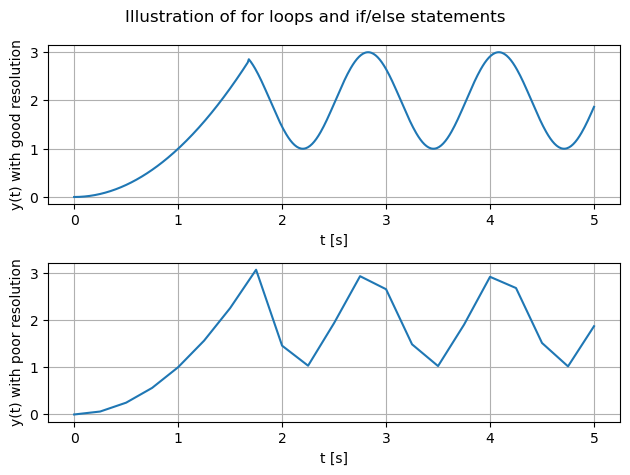

In [6]:
""" Example code for part 3 regarding array creation and proper plot generation """

import numpy as np
import matplotlib.pyplot as plt

steps = 1e-2 # Define step size 
t = np.arange(0, 5 + steps, steps) # The step size has to be added to make sure the array includes 5.0
print(f"Number of elements: len(t) = {len(t)}\nFirst element: t[0] = {t[0]}\nLast element: t[-1]: {t[-1]}")

# Create a signal using a for loop and if/else statements
def example1(t): # The only argument passed to the function is t
    """
    Signal y(t) creation for the example code of ECE 351 Lab 2
    
    Inputs: t - time vector
    
    Oututs: y - generated signal y(t)
    """ # ALL functions should start with a description telling the user about the function, including inputs, outputs, and and necessary information to use the function
    
    y = np.zeros(t.shape) # Initialize y(t) as an array of zeros that matches the size and shape of t
    for i in range(len(t)): # Run the loop for each index of t
        if i < (len(t) + 1) / 3:
            y[i] = t[i] ** 2
        else:
            y[i] = np.sin(5 * t[i]) + 2
    return y # Return the signal as an array

y = example1(t) # Call the function example(1) and pass it t

# Example plots including formatting
plt.figure() # Generate a figure
plt.subplot(2, 1, 1) # Generate subplots within the figure (2 rows, 1 column, # of plot)
plt.plot(t, y) # Plot t on the x-axis and y on the y-axis
plt.grid() # Include a grid for readability
plt.ylabel("y(t) with good resolution") # Label the y-axis
plt.xlabel("t [s]") # Label the x-axis (make sure you include units in square brackets when necessary
plt.suptitle("Illustration of for loops and if/else statements") # Title the entire figure, use plt.title to title individual subplots if necessary

t = np.arange(0, 5 + 0.25, 0.25) # Redefine t with poor resolution, notice since Python iterates line by line we can reuse the variable name without affecting previous code
y = example1(t) # Call the functions with the newly defined t

plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t) with poor resolution")
plt.xlabel("t [s]")
plt.tight_layout() # Makes sure axes don't overlap labels
plt.show() # Must include this so the IDE knows you are done drawing the figure

### 4. Part 1
##### 4.1 Purpose
Create a simple user-defined function.
##### 4.2 Tasks
1. Import the **numpy** and **matplotlib.pyplot** packages as demonstrated in the **Background** section. *Note: you do not need to include the as np or as plt as done above. Doing so simply creates an abbreviation with which you can call functions from each package.*

In [9]:
import numpy as np
import matplotlib.pyplot as plt

2. Following the structure provided in the **Example Code**, create your own function titled **func1** that implements the function $y = cos(t)$ using **numpy.cos()** and plot the function from $0 \le t \le 10$ s with small enough step sizes to achieve a curve of sufficient resolution. You may follow the plotting structure used in the **Example Code** section. *Note: The difference between good and poor function resolution (as determined by the step size of your dependent variable $t$) is highlighted and is important to be aware of whenever you plot.*

In [12]:
steps = 1e-1
t = np.arange(0, 10 + steps, steps)

def func1(t):
    """
    Part 1, Task 2 function for implementation of a cosine function
    
    Inputs: t - time vector
    
    Outputs: y - cosine signal y(t)
    """
    return np.cos(t)

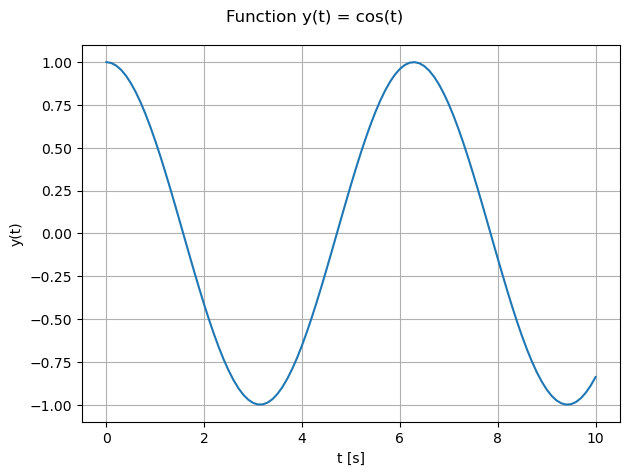

In [14]:
y = func1(t)

plt.figure()
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.suptitle("Function y(t) = cos(t)")
plt.tight_layout() # Makes sure axes don't overlap labels
plt.show()

### 5. Part 2
##### 5.1 Purpose
Create and utilize a user-defined function to model a simple plot.
##### 5.2 Tasks
1. Derive an equation to model the function below using step and ramp functions. Use **Markdown** to properly format this equation.  
![Function to plot](FunctionForLabTwo.png)

>Type your properly-formatted derived equation for the plot above here.

2. Create two user-defined functions, one implementing a step function and the other a ramp function. Plot each to demonstrate that each works properly. *Note: It may be best to use **if** statements and **for** loops for the definitions of these functions, as demonstrated in the **Example Code** section.*

In [19]:
def stepF(t):
    '''
    Step Function u(t)

    Input: t - time vector

    Output: Returns 1 for t >= 0, 0 for t < 0
    '''
    y = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] >= 0:
            y[i] = 1
        else:
            y[i] = 0
    return y
    

In [21]:
def rampF(t):
    '''
    Ramp Function r(t)

    Input: t - time vector

    Output: Returns t for t >= 0, 0 for t < 0
    '''
    y=np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] >= 0:
            y[i] = t[i]
        else:
            y[i] = 0
    return y

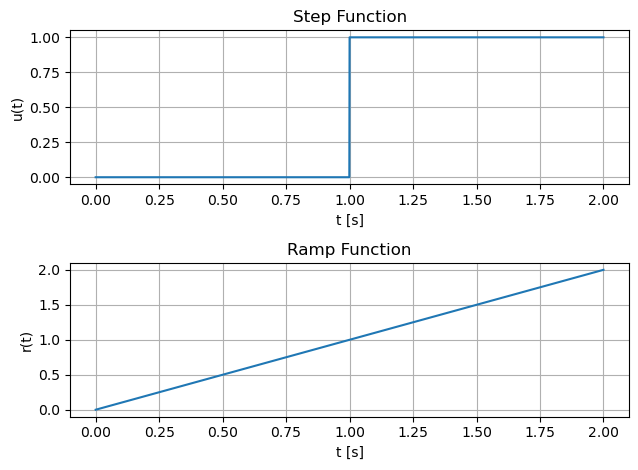

In [23]:
# Insert code calling and plotting both functions here. Plot the functions using 1 figure with 2 subplots.
step = 1e-3
t = np.arange(0, 2 + step, step)
y = stepF(t-1)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.grid()
plt.ylabel("u(t)")
plt.xlabel("t [s]")
plt.title("Step Function")


y = rampF(t)

plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.grid()
plt.ylabel("r(t)")
plt.xlabel("t [s]")
plt.title("Ramp Function")
plt.tight_layout()
plt.show()

3. Create a function to implement your derived equation. Plot your function from $-5 \le t \le 10$ s and confirm that it matches the figure above.

In [26]:
def derivF(t):
    '''
    Function implementing the signal shown in "Plot for lab 2"
    

    Input: t - time vector

    Output: r(t) + 5u(t-3) - r(t-3) - 2u(t-6) - 2r(t-6) + 2r(t-10)
    
    '''
    return (rampF(t) + 5*stepF(t-3)- rampF(t-3) - 2*stepF(t-6) - 2*rampF(t-6) + 2*rampF(t-10))

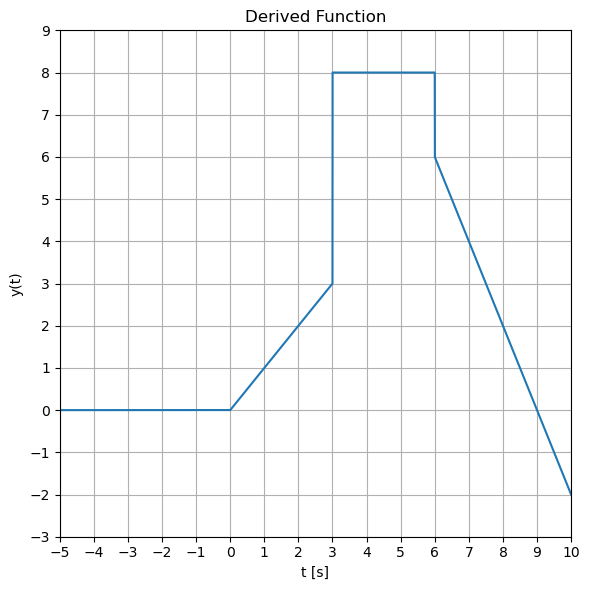

In [28]:
# Insert code calling and plotting your derived function here
step = 1e-3
t = np.arange(-5, 10 + step, step)
y = derivF(t)

plt.figure(figsize=(6,6))
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Derived Function")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])
plt.tight_layout()
plt.show()


### 6. Part 3
##### 6.1 Purpose
Test your function from **Part 2** with time-shifting and scaling operations.
##### 6.2 Tasks
Use your function from **Part 2** for all of the following tasks. *Note: You will need to adjust the plot limits and your time vector to properly scale each plot to show all the relevant information.*  
1. Apply a time reversal and plot the result.

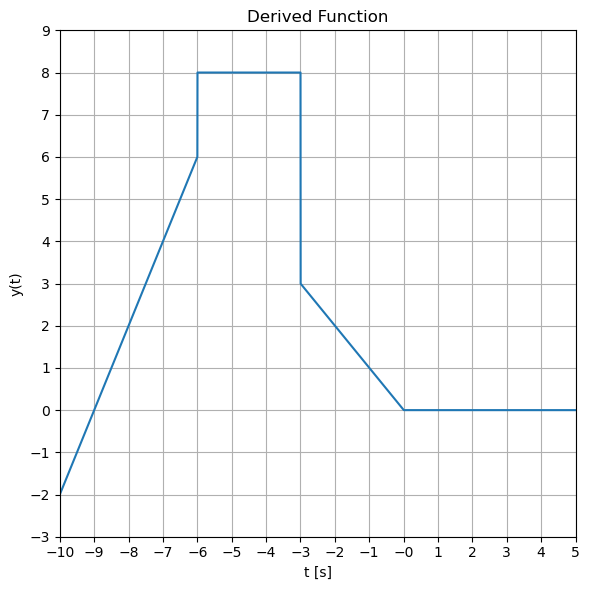

In [31]:
# Insert code calling and plotting your derived function here
step = 1e-3
t = np.arange(-10 - step, 5, step)
y = derivF(-t)

plt.figure(figsize=(6,6))
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Derived Function")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])
plt.tight_layout()
plt.show()


2. Apply time-shifting operations $f(t - 4)$ , $f(-t - 4)$ and plot the results.

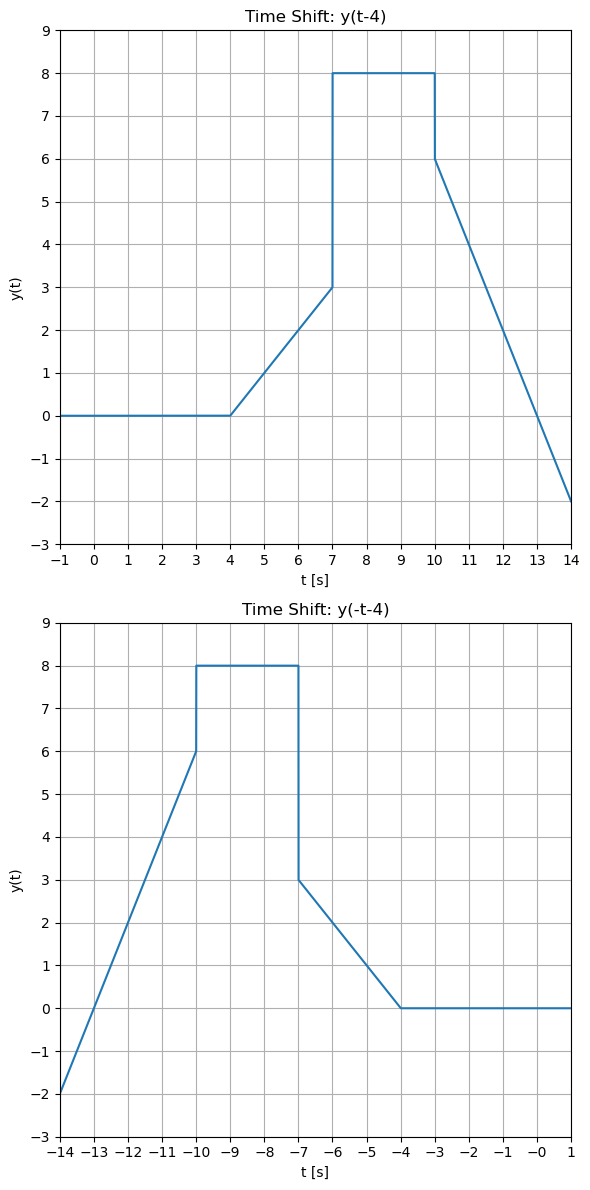

In [34]:
# Insert code calling and plotting your derived function here
step = 1e-3
t = np.arange(-1, 14 + step, step)
y = derivF(t-4)

plt.figure(figsize=(6,12))
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Time Shift: y(t-4)")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])

t = np.arange(-14 - step, 1, step)
y = derivF(-t-4)

plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Time Shift: y(-t-4)")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])
plt.tight_layout()
plt.show()

3. Apply time-scaling operations $f(t/2)$ , $f(2t)$ and plot the results.

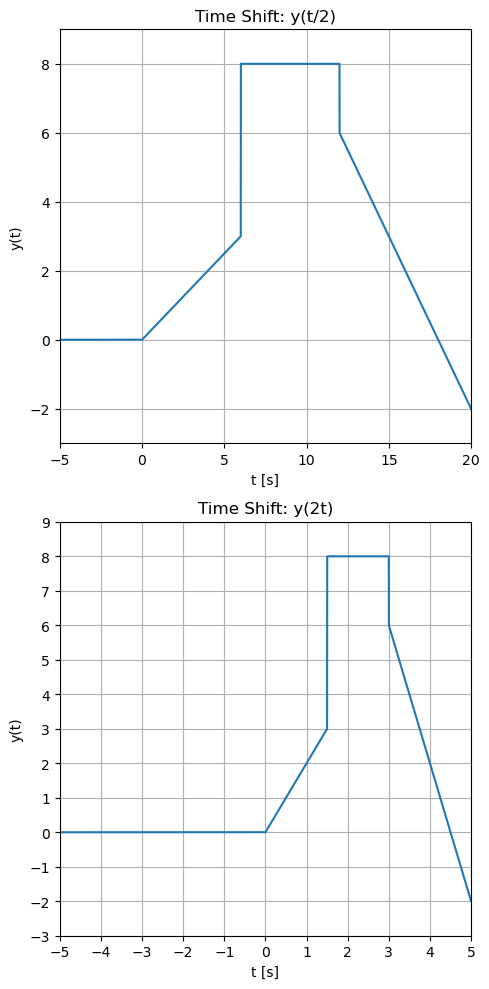

In [37]:
# Insert code applying and plotting the time scaling here. Plot the results in one figure.
step = 1e-3
t = np.arange(-5, 20 + step, step)
y = derivF(t/2)

plt.figure(figsize=(5,10))
plt.subplot(2, 1, 1)
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Time Shift: y(t/2)")
#plt.xticks(np.arange(min(t), max(t) + 1, 2))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 2))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])

t = np.arange(-5, 5 + step, step)
y = derivF(2*t)

plt.subplot(2, 1, 2)
plt.plot(t, y)
plt.grid()
plt.ylabel("y(t)")
plt.xlabel("t [s]")
plt.title("Time Shift: y(2t)")
plt.xticks(np.arange(min(t), max(t) + 1, 1))
plt.yticks(np.arange(min(y) - 2, max(y) + 2, 1))
plt.axis([min(t), max(t), min(y) - 1, max(y) + 1])
plt.tight_layout()
plt.show()


4. Use a drawing program to plot the derivative of the equation from **Part 2 Task 1**.

>Insert your drawn derivative plot here

5. Using the **numpy.diff()** function, plot the derivative of your user-defined function from **Part 2 Task 3** with respect to time. You can find details and syntax for this function within the **numpy** documentation.

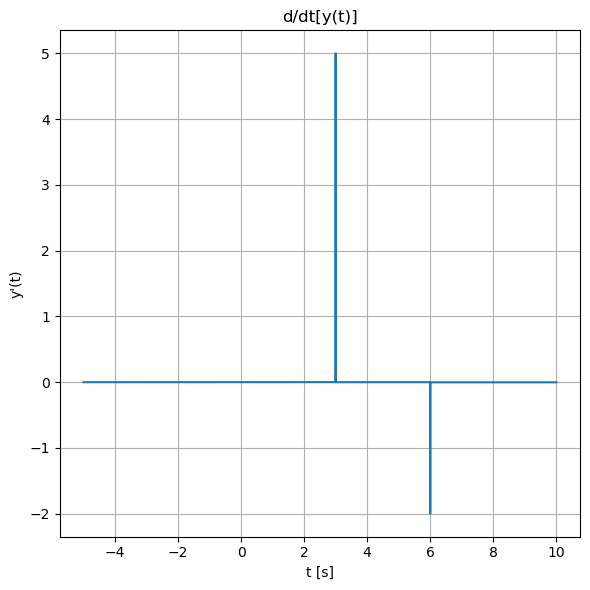

In [127]:
# Insert code plotting the derivative of your function here
step = 1e-3
t = np.arange(-5, 10 + step, step)
y = derivF(t)

dy = np.diff(y)
dt = t[:-1]

plt.figure(figsize=(6,6))
plt.plot(dt,dy)
plt.grid()
plt.ylabel("y'(t)")
plt.xlabel("t [s]")
plt.title("d/dt[y(t)]")
#plt.xticks(np.arange(min(dt), max(dt), 1))
#plt.yticks(np.arange(min(dy) - 1, max(dy) + 1, 1))
#plt.axis([min(dt), max(dt), min(dy) - 1, max(dy) + 1])
plt.tight_layout()
plt.show()

### 7. Questions
1. Are the plots from **Part 3 Task 4** and **Part 3 Task 5** identical? Is it possible for them to match? Explain why or why not.  
>Replace this text with your answer, but leave the ">" symbol.  
2. How does the correlation between the two plots (from **Part 3 Task 4** and **Part 3 Task 5**) change if you were to change the step size within the time variable in **Task 5**? Explain why this happens.  
>Replace this text with your answer, but leave the ">" symbol.
3. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>Replace this text with your answer, but leave the ">" symbol.